# **Procesamiento de Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importación de librerías necesarias para el preprocesamiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 9)
plt.style.use('ggplot')

## Lectura de los Archivos de Datos

**La descripción de cada una de las variables que tienen su nombre en código escrito de la forma P#### y de los posibles valores que pueden tomar se encuentran en el archivo 'Variables de interés'.**

In [ ]:
caracteristicas_hogar = pd.read_csv('/content/drive/MyDrive/Técnicas de aprendizaje estadístico/Trabajo_1/Caracteristicas y composicion del hogar.csv',delimiter=';')

In [ ]:
caracteristicas_hogar

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P6016,P1894,P6020,P6034,P6040,P6051,P5502,P6071,P6071S1,P756,P756S1,P756S2,P756S3,P6074,P767,P6076,P6076S1,P6076S2,P6077,P6096,P6081,P6081S1,P6087,P6083,P6083S1,P6088,P6080,P5667,P2057,P2059,P2061,P1895,P1896,P1897,P1898,P1899,P1901,P1903,P1904,P1905,P1927,FEX_C
0,7120001,1,1,1,1,3,2,1,44,1,2,1,2,1,,,,1,,,,,,,2,,10,3,,1,6,,2,2,2,10,10,8,10,10,10,0,0,10,10,"208,34913730011"
1,7120001,2,1,2,2,3,1,1,48,2,2,1,1,2,23,23182,,2,22,2,23,23417,1,8,3,,3,2,,3,1,800_02,2,2,2,8,6,9,6,6,10,0,0,10,5,"208,34913730011"
2,7120001,3,1,3,3,2,1,1,13,3,5,,,1,,,,1,,,,,,,1,2,,1,1,,1,800_02,,,,,,,,,,,,,,"208,34913730011"
3,7120001,4,1,4,4,3,1,1,24,14,5,,,1,,,,2,7,2,11,11001,1,11,2,,8,2,,8,6,,2,2,2,7,5,7,8,9,7,5,0,6,6,"208,34913730011"
4,7120002,1,1,1,1,3,1,1,61,1,6,1,2,1,,,,1,,,,,,,3,,2,3,,2,5,,2,2,2,6,6,8,6,7,8,3,2,8,7,"306,477351890009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289553,7247298,1,1,1,1,3,2,1,30,1,4,,,2,27,27077,,1,,,,,,,3,,4,2,,4,5,,1,,2,10,10,8,5,10,10,0,0,10,7,"51,6590649500192"
289554,7247298,2,1,2,1,2,2,1,7,3,,,,2,76,76001,,1,,,,,,,2,,6,1,1,,5,,,,,,,,,,,,,,,"51,6590649500192"
289555,7247298,3,1,3,3,3,2,1,53,5,3,,,2,27,27077,,2,12,2,27,27077,1,6,3,,4,3,,4,5,,1,,2,8,6,6,5,6,10,2,1,9,7,"51,6590649500192"
289556,7247298,4,1,4,1,2,2,1,14,14,5,,,2,27,27077,,2,9,2,27,27077,1,4,2,,4,2,,4,5,,,,,,,,,,,,,,,"51,6590649500192"


Se eliminan las filas que tengan duplicadas el valor del 'DIRECTORIO' y 'SECUENCIA_ENCUESTA' simultáneamente, debido a que estas dos columnas conforman el identificador único de cada fila de este conjunto de datos (ID del hogar y ID del miembro en ese hogar respecitvamente). Esto se hace con el fin de evitar errores posteriormente a la hora de unir los datos con otros archivos por medio de este identificador.

In [ ]:
caracteristicas_hogar.drop_duplicates(['DIRECTORIO','SECUENCIA_ENCUESTA'],keep='first',inplace=True)

Se realiza una agrupación por el 'DIRECTORIO' y 'P6051' (parentesco con el jefe o la jefa del hogar) y se realiza un conteo de estos, esto se hace con el fin de saber cuántos parientes del mismo tipo hay en un hogar, es decir, cuántos hijos, nietos, padres, hermanos hay en el hogar.

In [ ]:
result = caracteristicas_hogar.groupby(['DIRECTORIO','P6051'])['P6051'].count().reset_index(name='COUNT')

Se toma solo las filas que tienen la columna 'P6051' igual a 3 para saber cuántos hijos hay en cada uno de los hogares.

In [ ]:
mask = result["P6051"] == 3

In [ ]:
result = result[mask]

In [ ]:
result

,DIRECTORIO,P6051,COUNT
2,7120001,3,1
6,7120002,3,5
18,7120009,3,1
21,7120010,3,3
25,7120016,3,2
...,...,...,...
230358,7247289,3,1
230360,7247290,3,2
230364,7247293,3,2
230372,7247295,3,2


In [ ]:
vivienda = pd.read_csv('/content/drive/MyDrive/Técnicas de aprendizaje estadístico/Trabajo_1/Datos de la vivienda.csv',delimiter=";")

Se selecciona solamente las variables que son de interés de este conjunto de datos.

In [ ]:
vivienda_resum= vivienda[['DIRECTORIO','REGION','CANT_HOGARES_VIVIENDA','CLASE','P1070','P8520S1','P8520S1A1','P8520S5','P8520S3']] #'P4005','P4015','P4567',

Se eliminan los hogares que cuenten con el valor en la columna 'DIRECTORIO' iguales manteniendo solo el último registro, debido a que esta columna posee los valores únicos que identifican a cada fila. 

In [ ]:
vivienda_resum.drop_duplicates(['DIRECTORIO'],keep='last',inplace=True)

In [ ]:
vivienda_resum

,DIRECTORIO,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3
0,7120001,1,1,1,2,1,3,1,1
1,7120002,1,1,1,1,1,2,1,1
2,7120005,1,1,1,1,1,3,1,1
3,7120006,1,1,1,2,1,3,1,1
4,7120007,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
93156,7247294,1,1,1,2,1,1,1,1
93157,7247295,1,1,1,2,1,1,1,1
93158,7247297,1,1,2,4,2,,2,2
93159,7247298,4,1,1,2,1,1,2,2


In [ ]:
educacion= pd.read_csv('/content/drive/MyDrive/Técnicas de aprendizaje estadístico/Trabajo_1/Educación.csv',delimiter=";")

In [ ]:
educacion

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P6160,P8586,P6218,P8587,P8587S1,P6211,P5455,P1088,P1088S1,P6216,P5457,P5673,P5674,P6223,P1101,P5461,P5461S1,P5461S2,P5461S3,P4693,P6167,P6180,P6180S1,P6180S2,P1928,P1928S1,P1928S2,P1928S2A1,P8610,P8610S1,P8610S2,P6229,P8612,P8612S1,P8612S2,P6238,P8614,P8614S1,P8614S2,P6202,P781,P781S1,P781S2,P782,P783,P3004,P3004S1,P3004S2,P3004S3,P3004S4,P3004S5,P3004S6,P3004S7,FEX_C
0,7120001,1,1,1,1,2,,7,2,2,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"208,34913730011"
1,7120001,2,1,2,1,2,,11,5,5,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"208,34913730011"
2,7120001,3,1,3,1,1,,,,,,3,7,,,1,,1,1,,2,2,2,4,10,2,,,,,,,2,,,,2,,,,2,,,,1,1,,,,,,,1,,1,1,1,"208,34913730011"
3,7120001,4,1,4,1,1,,,,,,8,1,5,1,2,,1,,,,,,3,15,2,,,,,,,2,,,,2,,,,2,,,,,,,,,,,,,,,,,"208,34913730011"
4,7120002,1,1,1,1,2,,5,11,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"306,477351890009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266621,7247298,1,1,1,1,2,9,11,5,5,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"51,6590649500192"
266622,7247298,2,1,2,1,1,,,,,,2,1,,,1,,1,1,,1,2,2,3,15,2,,,,,,,2,,,,2,,,,2,,,,1,1,,,,,,,,1,,,,"51,6590649500192"
266623,7247298,3,1,3,1,2,,5,11,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"51,6590649500192"
266624,7247298,4,1,4,1,1,,,,,,3,6,,,1,,1,1,,1,2,2,4,5,1,0,2000,,1,2,,2,,,,2,,,,2,,,,1,1,,,,,,,,,,1,1,"51,6590649500192"


In [ ]:
ed = educacion[['DIRECTORIO','SECUENCIA_ENCUESTA','P8587']]

In [ ]:
ed.drop_duplicates(['DIRECTORIO','SECUENCIA_ENCUESTA'],keep='first',inplace=True)

In [ ]:
c_h = caracteristicas_hogar[['DIRECTORIO','SECUENCIA_ENCUESTA','P6020','P6040','P6051']]

Se toman solo las filas que tienen un valor en la columna 'P6051' menor igual a 2, esto con el objetivo de tomar solo a los padres del hogar (1: Jefe (a) del hogar; 2: Pareja, esposo (a), cónyugue, compañero (a)). 

In [ ]:
c_h = c_h[c_h['P6051'] <= 2]

In [ ]:
c_h

,DIRECTORIO,SECUENCIA_ENCUESTA,P6020,P6040,P6051
0,7120001,1,2,44,1
1,7120001,2,1,48,2
4,7120002,1,1,61,1
5,7120002,2,2,54,2
14,7120005,1,1,79,1
...,...,...,...,...,...
289547,7247295,1,2,20,1
289548,7247295,2,1,25,2
289552,7247297,1,1,34,1
289553,7247298,1,2,30,1


Se realiza una unión de los conjuntos de datos correspondientes al de las características del hogar y el de la educación, con el fin de tener en un solo conjunto de datos la información de los padres del hogar.

In [ ]:
aux=pd.merge(c_h,ed,on=['DIRECTORIO','SECUENCIA_ENCUESTA'])

In [ ]:
aux

,DIRECTORIO,SECUENCIA_ENCUESTA,P6020,P6040,P6051,P8587
0,7120001,1,2,44,1,7
1,7120001,2,1,48,2,11
2,7120002,1,1,61,1,5
3,7120002,2,2,54,2,3
4,7120005,1,1,79,1,11
...,...,...,...,...,...,...
146034,7247295,1,2,20,1,4
146035,7247295,2,1,25,2,4
146036,7247297,1,1,34,1,3
146037,7247298,1,2,30,1,11


In [ ]:
fuerza_trabajo = pd.read_csv('/content/drive/MyDrive/Técnicas de aprendizaje estadístico/Trabajo_1/Fuerza de trabajo.csv',delimiter=';')

In [ ]:
f_t= fuerza_trabajo[['DIRECTORIO','SECUENCIA_ENCUESTA','P6240','P6460']]

In [ ]:
f_t.drop_duplicates(['DIRECTORIO','SECUENCIA_ENCUESTA'],keep='first',inplace=True)

In [ ]:
f_t

,DIRECTORIO,SECUENCIA_ENCUESTA,P6240,P6460
0,7120001,1,4,
1,7120001,2,1,1
2,7120001,3,3,
3,7120001,4,1,2
4,7120002,1,1,1
...,...,...,...,...
230813,7247297,1,1,
230814,7247298,1,1,2
230815,7247298,3,4,
230816,7247298,4,3,


In [ ]:
aux = pd.merge(aux,f_t,on=['DIRECTORIO','SECUENCIA_ENCUESTA'])

In [ ]:
aux

,DIRECTORIO,SECUENCIA_ENCUESTA,P6020,P6040,P6051,P8587,P6240,P6460
0,7120001,1,2,44,1,7,4,
1,7120001,2,1,48,2,11,1,1
2,7120002,1,1,61,1,5,1,1
3,7120002,2,2,54,2,3,5,
4,7120005,1,1,79,1,11,4,
...,...,...,...,...,...,...,...,...
146034,7247295,1,2,20,1,4,4,
146035,7247295,2,1,25,2,4,1,
146036,7247297,1,1,34,1,3,1,
146037,7247298,1,2,30,1,11,1,2


Se reemplaza los espacios en blanco de la columna 'P8587' (¿Cuál es el nivel educativo más alto alcanzado por ...?) por un 1, el cual corresponde a 'Ninguno')

In [ ]:
aux['P8587'].replace(' ',1,inplace=True)

El resto de valores del conjunto de datos que solo tengan un espacio serán reemplazados con un 0, ya que según la definición de los valores que puede tomar cada una de las variables, esto es lo indicado para manejar estos casos.

In [ ]:
aux.replace(' ',0,inplace=True)

In [ ]:
aux

,DIRECTORIO,SECUENCIA_ENCUESTA,P6020,P6040,P6051,P8587,P6240,P6460
0,7120001,1,2,44,1,7,4,0
1,7120001,2,1,48,2,11,1,1
2,7120002,1,1,61,1,5,1,1
3,7120002,2,2,54,2,3,5,0
4,7120005,1,1,79,1,11,4,0
...,...,...,...,...,...,...,...,...
146034,7247295,1,2,20,1,4,4,0
146035,7247295,2,1,25,2,4,1,0
146036,7247297,1,1,34,1,3,1,0
146037,7247298,1,2,30,1,11,1,2


Se separan los padres y madres en dos conjuntos de datos diferentes para luego unirlos en un conjunto de datos nuevo, donde en una misma fila estarán los datos tanto del padre como de la madre y que solo exista una fila por hogar.

In [ ]:
padres = aux[aux['P6020']==1]

In [ ]:
madres = aux[aux['P6020']==2]

In [ ]:
padres_total= pd.merge(padres,madres,on='DIRECTORIO',how='outer')

In [ ]:
padres_total

,DIRECTORIO,SECUENCIA_ENCUESTA_x,P6020_x,P6040_x,P6051_x,P8587_x,P6240_x,P6460_x,SECUENCIA_ENCUESTA_y,P6020_y,P6040_y,P6051_y,P8587_y,P6240_y,P6460_y
0,7120001,2.0,1.0,48.0,2.0,11,1.0,1,1.0,2.0,44.0,1.0,7,4.0,0
1,7120002,1.0,1.0,61.0,1.0,5,1.0,1,2.0,2.0,54.0,2.0,3,5.0,0
2,7120005,1.0,1.0,79.0,1.0,11,4.0,0,2.0,2.0,75.0,2.0,4,4.0,0
3,7120007,1.0,1.0,72.0,1.0,4,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7120008,1.0,1.0,73.0,1.0,3,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,24.0,1.0,4,1.0,2
93228,7247288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,22.0,1.0,9,1.0,1
93229,7247289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,22.0,1.0,4,4.0,0
93230,7247290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,47.0,1.0,3,4.0,0


In [ ]:
padres_total= pd.merge(padres_total,result,on='DIRECTORIO',how='left')

In [ ]:
padres_total

,DIRECTORIO,SECUENCIA_ENCUESTA_x,P6020_x,P6040_x,P6051_x,P8587_x,P6240_x,P6460_x,SECUENCIA_ENCUESTA_y,P6020_y,P6040_y,P6051_y,P8587_y,P6240_y,P6460_y,P6051,COUNT
0,7120001,2.0,1.0,48.0,2.0,11,1.0,1,1.0,2.0,44.0,1.0,7,4.0,0,3.0,1.0
1,7120002,1.0,1.0,61.0,1.0,5,1.0,1,2.0,2.0,54.0,2.0,3,5.0,0,3.0,5.0
2,7120005,1.0,1.0,79.0,1.0,11,4.0,0,2.0,2.0,75.0,2.0,4,4.0,0,NaN,NaN
3,7120007,1.0,1.0,72.0,1.0,4,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7120008,1.0,1.0,73.0,1.0,3,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,24.0,1.0,4,1.0,2,3.0,2.0
93228,7247288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,22.0,1.0,9,1.0,1,3.0,1.0
93229,7247289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,22.0,1.0,4,4.0,0,3.0,1.0
93230,7247290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,47.0,1.0,3,4.0,0,3.0,2.0


Se reemplaza el nombre de las columnas por unas mas entendibles

In [ ]:
padres_total=padres_total[['DIRECTORIO','P6040_x','P8587_x','P6240_x','P6460_x','P6040_y','P8587_y','P6240_y','P6460_y','COUNT']] #'P6211_x','P8624_x','P6211_y','P8624_y'
padres_total.columns=['DIRECTORIO','EDAD_PADRE','P8587_PADRE','P6240_PADRE','P6460_PADRE','EDAD_MADRE','P8587_MADRE','P6240_MADRE','P6460_MADRE','NUMERO_HIJOS'] #'P6211_PADRE','P8624_PADRE','P6211_MADRE','P8624_MADRE'

Se llenan los valores NaN de las columnas por valores default

In [ ]:
padres_total['P8587_PADRE'].fillna(1,inplace=True)
padres_total['P6240_PADRE'].fillna(6,inplace=True)
padres_total['P8587_MADRE'].fillna(1,inplace=True)
padres_total['P6240_MADRE'].fillna(6,inplace=True)
padres_total.fillna(0,inplace=True)

In [ ]:
padres_total

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,NUMERO_HIJOS
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1.0
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,5.0
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,NaN
3,7120007,72.0,4,4.0,0,NaN,1,6.0,NaN,NaN
4,7120008,73.0,3,6.0,0,NaN,1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
93227,7247282,NaN,1,6.0,NaN,24.0,4,1.0,2,2.0
93228,7247288,NaN,1,6.0,NaN,22.0,9,1.0,1,1.0
93229,7247289,NaN,1,6.0,NaN,22.0,4,4.0,0,1.0
93230,7247290,NaN,1,6.0,NaN,47.0,3,4.0,0,2.0


Se saca del conjunto de datos de servicios del hogar las variables de interes

In [ ]:
servicios_h = pd.read_csv('/content/drive/MyDrive/Técnicas de aprendizaje estadístico/Trabajo_1/Servicios del hogar.csv',delimiter=";")

In [ ]:
servicios_h = servicios_h[['DIRECTORIO','I_HOGAR','P5000','CANT_PERSONAS_HOGAR']] #

In [ ]:
servicios_h.drop_duplicates(['DIRECTORIO'],keep='last',inplace=True)

In [ ]:
servicios_h

,DIRECTORIO,I_HOGAR,P5000,CANT_PERSONAS_HOGAR
0,7120001,3800000,3,4
1,7120002,"3656652,83333333",5,10
2,7120005,4200000,5,2
3,7120006,1365000,3,3
4,7120007,"765833,333333333",4,3
...,...,...,...,...
93988,7247294,950000,2,1
93989,7247295,1161500,3,5
93990,7247297,275000,1,1
93991,7247298,"38333,3333333333",3,4


Se realiza un merge entre los datos de los padres y la vivienda, para asi juntar la información

In [ ]:
rev = pd.merge(padres_total,vivienda_resum,on='DIRECTORIO')

In [ ]:
rev

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,NUMERO_HIJOS,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1.0,1,1,1,2,1,3,1,1
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,5.0,1,1,1,1,1,2,1,1
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,0.0,1,1,1,1,1,3,1,1
3,7120007,72.0,4,4.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1
4,7120008,73.0,3,6.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,0.0,1,6.0,0,24.0,4,1.0,2,2.0,1,1,2,4,1,0,2,2
93228,7247288,0.0,1,6.0,0,22.0,9,1.0,1,1.0,8,1,1,2,1,2,2,2
93229,7247289,0.0,1,6.0,0,22.0,4,4.0,0,1.0,1,1,2,1,1,1,2,2
93230,7247290,0.0,1,6.0,0,47.0,3,4.0,0,2.0,1,1,2,1,1,1,2,2


Se realiza un merge entre los datos anteriores junto a los servicios del hogar para asi juntar la información

In [ ]:
rev = pd.merge(rev,servicios_h,on='DIRECTORIO') 

In [ ]:
rev

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,NUMERO_HIJOS,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3,I_HOGAR,P5000,CANT_PERSONAS_HOGAR
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1.0,1,1,1,2,1,3,1,1,3800000,3,4
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,5.0,1,1,1,1,1,2,1,1,"3656652,83333333",5,10
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,0.0,1,1,1,1,1,3,1,1,4200000,5,2
3,7120007,72.0,4,4.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1,"765833,333333333",4,3
4,7120008,73.0,3,6.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1,"1785721,91666667",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,0.0,1,6.0,0,24.0,4,1.0,2,2.0,1,1,2,4,1,0,2,2,830500,2,3
93228,7247288,0.0,1,6.0,0,22.0,9,1.0,1,1.0,8,1,1,2,1,2,2,2,1078000,2,2
93229,7247289,0.0,1,6.0,0,22.0,4,4.0,0,1.0,1,1,2,1,1,1,2,2,200000,3,2
93230,7247290,0.0,1,6.0,0,47.0,3,4.0,0,2.0,1,1,2,1,1,1,2,2,1037500,2,4


Se cambia el tipo del dato de los ingresos del hogar, para eliminar la parte decimal, y luego paso a integer nuevamente

In [ ]:
rev['I_HOGAR'] = rev['I_HOGAR'].astype(str)

In [ ]:
rev['I_HOGAR'] = rev.apply(lambda row : row['I_HOGAR'].split(',')[0], axis = 1)

In [ ]:
rev['I_HOGAR'] = rev['I_HOGAR'].astype(float)

In [ ]:
rev

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,NUMERO_HIJOS,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3,I_HOGAR,P5000,CANT_PERSONAS_HOGAR
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1.0,1,1,1,2,1,3,1,1,3800000.0,3,4
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,5.0,1,1,1,1,1,2,1,1,3656652.0,5,10
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,0.0,1,1,1,1,1,3,1,1,4200000.0,5,2
3,7120007,72.0,4,4.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1,765833.0,4,3
4,7120008,73.0,3,6.0,0,0.0,1,6.0,0,0.0,1,1,1,2,1,2,1,1,1785721.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,0.0,1,6.0,0,24.0,4,1.0,2,2.0,1,1,2,4,1,0,2,2,830500.0,2,3
93228,7247288,0.0,1,6.0,0,22.0,9,1.0,1,1.0,8,1,1,2,1,2,2,2,1078000.0,2,2
93229,7247289,0.0,1,6.0,0,22.0,4,4.0,0,1.0,1,1,2,1,1,1,2,2,200000.0,3,2
93230,7247290,0.0,1,6.0,0,47.0,3,4.0,0,2.0,1,1,2,1,1,1,2,2,1037500.0,2,4




> Ordenamiento de la variable de interes (Y, numero de hijos)



In [ ]:
first_column = rev.pop('NUMERO_HIJOS')
first_column = first_column.apply(np.int64)
rev.insert(20, 'NUMERO_HIJOS', first_column) #26,20

In [ ]:
rev

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3,I_HOGAR,P5000,CANT_PERSONAS_HOGAR,NUMERO_HIJOS
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1,1,1,2,1,3,1,1,3800000.0,3,4,1
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,1,1,1,1,1,2,1,1,3656652.0,5,10,5
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,1,1,1,1,1,3,1,1,4200000.0,5,2,0
3,7120007,72.0,4,4.0,0,0.0,1,6.0,0,1,1,1,2,1,2,1,1,765833.0,4,3,0
4,7120008,73.0,3,6.0,0,0.0,1,6.0,0,1,1,1,2,1,2,1,1,1785721.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,0.0,1,6.0,0,24.0,4,1.0,2,1,1,2,4,1,0,2,2,830500.0,2,3,2
93228,7247288,0.0,1,6.0,0,22.0,9,1.0,1,8,1,1,2,1,2,2,2,1078000.0,2,2,1
93229,7247289,0.0,1,6.0,0,22.0,4,4.0,0,1,1,2,1,1,1,2,2,200000.0,3,2,1
93230,7247290,0.0,1,6.0,0,47.0,3,4.0,0,1,1,2,1,1,1,2,2,1037500.0,2,4,2


**SE CONVIERTE EL CONJUNTO DE DATOS EN UN ARCHIVO CSV**

In [ ]:
rev.to_csv('out.csv',index=False)

#Entrenamiento y validacion del conjunto de datos

## Lectura del conjunto de datos

In [ ]:
ek = pd.read_csv('/content/out.csv')

In [ ]:
ek

,DIRECTORIO,EDAD_PADRE,P8587_PADRE,P6240_PADRE,P6460_PADRE,EDAD_MADRE,P8587_MADRE,P6240_MADRE,P6460_MADRE,REGION,CANT_HOGARES_VIVIENDA,CLASE,P1070,P8520S1,P8520S1A1,P8520S5,P8520S3,I_HOGAR,P5000,CANT_PERSONAS_HOGAR,NUMERO_HIJOS
0,7120001,48.0,11,1.0,1,44.0,7,4.0,0,1,1,1,2,1,3,1,1,3800000.0,3,4,1
1,7120002,61.0,5,1.0,1,54.0,3,5.0,0,1,1,1,1,1,2,1,1,3656652.0,5,10,5
2,7120005,79.0,11,4.0,0,75.0,4,4.0,0,1,1,1,1,1,3,1,1,4200000.0,5,2,0
3,7120007,72.0,4,4.0,0,0.0,1,6.0,0,1,1,1,2,1,2,1,1,765833.0,4,3,0
4,7120008,73.0,3,6.0,0,0.0,1,6.0,0,1,1,1,2,1,2,1,1,1785721.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93227,7247282,0.0,1,6.0,0,24.0,4,1.0,2,1,1,2,4,1,0,2,2,830500.0,2,3,2
93228,7247288,0.0,1,6.0,0,22.0,9,1.0,1,8,1,1,2,1,2,2,2,1078000.0,2,2,1
93229,7247289,0.0,1,6.0,0,22.0,4,4.0,0,1,1,2,1,1,1,2,2,200000.0,3,2,1
93230,7247290,0.0,1,6.0,0,47.0,3,4.0,0,1,1,2,1,1,1,2,2,1037500.0,2,4,2


##Correlación de las variables

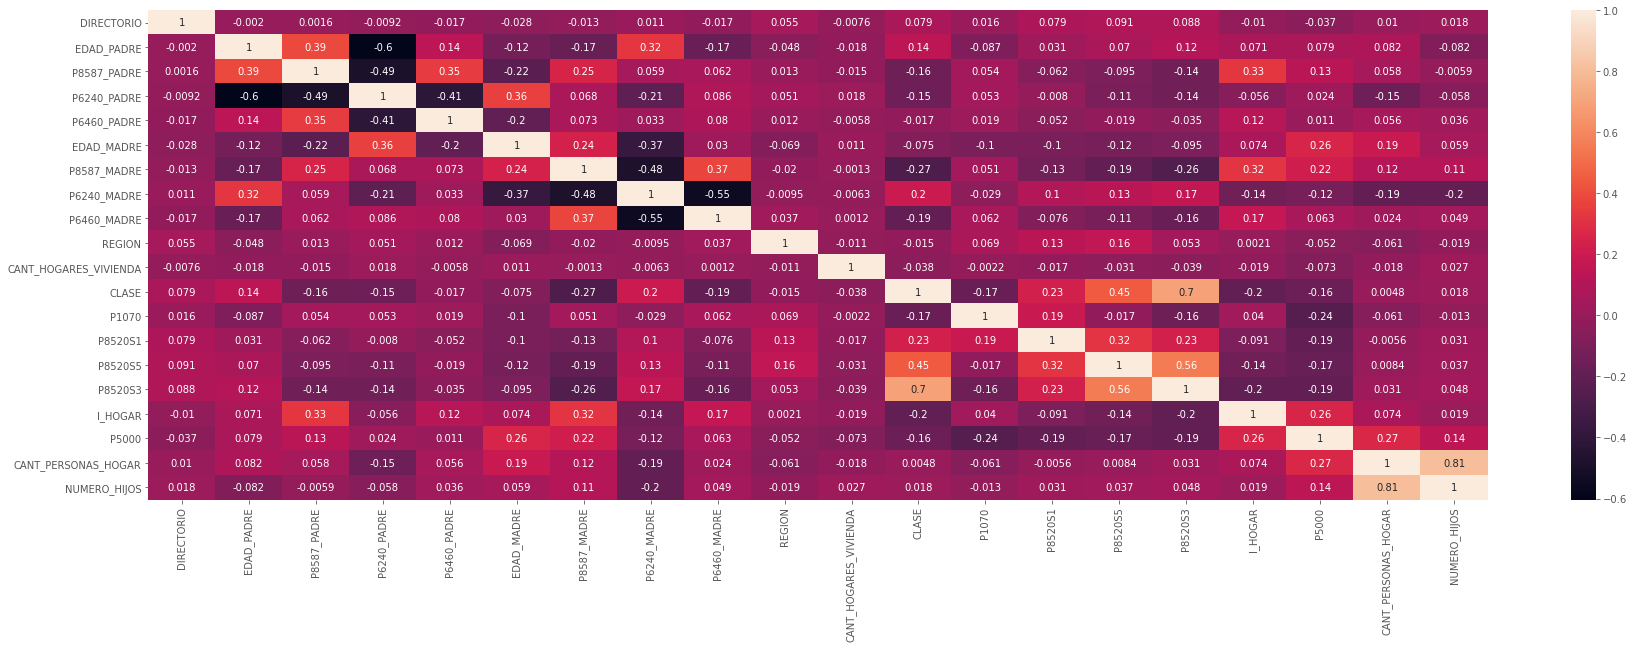

In [ ]:
cor = ek.corr()
sns.heatmap(cor, annot = True)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
#from pycaret.classification import compare_models
#from pycaret.regression import *

In [ ]:
ek.drop('DIRECTORIO',axis=1,inplace=True)

In [ ]:
ek.dtypes

EDAD_PADRE               float64
P8587_PADRE                int64
P6240_PADRE              float64
P6460_PADRE                int64
EDAD_MADRE               float64
P8587_MADRE                int64
P6240_MADRE              float64
P6460_MADRE                int64
REGION                     int64
CANT_HOGARES_VIVIENDA      int64
CLASE                      int64
P1070                      int64
P8520S1                    int64
P8520S1A1                 object
P8520S5                    int64
P8520S3                    int64
I_HOGAR                  float64
P5000                      int64
CANT_PERSONAS_HOGAR        int64
NUMERO_HIJOS               int64
dtype: object

Se usa la libreria PYRCARET para determinar el modelo que mejor rendimiento da con los datos

In [ ]:
grid = setup(data=ek, target='NUMERO_HIJOS',categorical_features=['P6240_PADRE','P6240_MADRE']) #,numeric_features=['P6211_PADRE','P6211_MADRE']

In [ ]:
best = compare_models(fold=10,n_select=5, exclude=['gbc']) #include=['rf','gbc','lightgbm']

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7894,0.0,0.5280,0.7986,0.7925,0.7100,0.7109,14.916
et,Extra Trees Classifier,0.7738,0.0,0.5017,0.7822,0.7768,0.6884,0.6891,20.941
lightgbm,Light Gradient Boosting Machine,0.7516,0.0,0.3777,0.7701,0.7591,0.6591,0.6602,8.730
dt,Decision Tree Classifier,0.7353,0.0,0.4630,0.7343,0.7347,0.6310,0.6310,0.989
lda,Linear Discriminant Analysis,0.7137,0.0,0.5743,0.7301,0.7184,0.6073,0.6084,2.606
ridge,Ridge Classifier,0.7020,0.0,0.4653,0.7114,0.7019,0.5895,0.5915,0.205
ada,Ada Boost Classifier,0.6189,0.0,0.2639,0.6233,0.5794,0.4608,0.4948,5.359
knn,K Neighbors Classifier,0.4245,0.0,0.1386,0.3817,0.3962,0.1592,0.1615,2.677
lr,Logistic Regression,0.3911,0.0,0.1022,0.1530,0.2199,0.0000,0.0000,20.066
nb,Naive Bayes,0.3899,0.0,0.1020,0.2370,0.2395,0.0046,0.0119,0.274


In [ ]:
best[3]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1306, splitter='best')

In [ ]:
save_model(best[3],'model_pre_clas_DT')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['P6240_PADRE',
                                                             'P6240_MADRE'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='NUMERO_HIJOS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_v...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                